## Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('AusApparalSales4thQrt2020.csv')
data.head(100)

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
95,2-Oct-2020,Evening,WA,Seniors,6,15000
96,2-Oct-2020,Morning,NT,Kids,5,12500
97,2-Oct-2020,Morning,NT,Men,13,32500
98,2-Oct-2020,Morning,NT,Women,13,32500


### Data wrangling and Feature Engineering

In [3]:
data.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [4]:
for columns in ['Time','State','Group']:
    print(data[columns].value_counts())

Time
Morning      2520
Afternoon    2520
Evening      2520
Name: count, dtype: int64
State
WA     1080
NT     1080
SA     1080
VIC    1080
QLD    1080
NSW    1080
TAS    1080
Name: count, dtype: int64
Group
Kids       1890
Men        1890
Women      1890
Seniors    1890
Name: count, dtype: int64


In [5]:
Time_map = {"Morning": 1, "Afternoon": 2, "Evening": 3}
data['Time'] = data['Time'].str.strip() 
data['time_encod'] = data.Time.map(Time_map)
data.head()

,Date,Time,State,Group,Unit,Sales,time_encod
0,1-Oct-2020,Morning,WA,Kids,8,20000,1
1,1-Oct-2020,Morning,WA,Men,8,20000,1
2,1-Oct-2020,Morning,WA,Women,4,10000,1
3,1-Oct-2020,Morning,WA,Seniors,15,37500,1
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,2


In [6]:
Group_map = {"Kids": 1, "Men": 2, "Women": 3, "Seniors": 4}
data['Group'] = data['Group'].str.strip() 
data['group_encod'] = data.Group.map(Group_map)
data.head()

,Date,Time,State,Group,Unit,Sales,time_encod,group_encod
0,1-Oct-2020,Morning,WA,Kids,8,20000,1,1
1,1-Oct-2020,Morning,WA,Men,8,20000,1,2
2,1-Oct-2020,Morning,WA,Women,4,10000,1,3
3,1-Oct-2020,Morning,WA,Seniors,15,37500,1,4
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,2,1


In [7]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Sales', 'Unit']
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

data.head()

,Date,Time,State,Group,Unit,Sales,time_encod,group_encod
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238,1,1
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238,1,2
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746,1,3
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349,1,4
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873,2,1


In [8]:
state_sales = data.groupby('State')['Sales'].sum().reset_index()
group_sales = data.groupby('Group')['Sales'].sum().reset_index()

### Data Analysis

In [9]:
sales_mean = data['Sales'].mean()
sales_median = data['Sales'].median()
sales_mode = data['Sales'].mode()[0]
sales_std = data['Sales'].std()
print("Sales mean: ",sales_mean)
print("Sales median: ",sales_median)
print("Sales mode :",sales_mode)
print("Sales Standard Deviation :",sales_std)

Sales mean:  0.25405433778449654
Sales median:  0.1904761904761905
Sales mode : 0.1111111111111111
Sales Standard Deviation : 0.2047841710728009


#### Observation

*1.* The mean sales value indicates the average normalized sales across all states and demographic groups. This value suggests a moderate level of sales performance when compared to the maximum normalized sales value of 1.

*2.* The median, is lower than the mean and Mode is lower than Median. This implies a right-skewed distribution, indicating that while some states or demographic groups are performing well (pushing the mean up), many are performing below average.

*3.* Mode is much lower than mean, which means there are alot of values which are below average or states or demographic group which has performed below average.

*4* A relatively high standard deviation compared to the mean suggests that there is considerable variation in sales performance across different states or demographic groups. Some states likely have much higher sales, while others have significantly lower sales.

In [10]:
data['Date'] = pd.to_datetime(data['Date'])

data['Day'] = data['Date'].dt.day
data['Week'] = data['Date'].dt.isocalendar().week
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter

weekly_sales = data.groupby('Week')['Sales'].sum()
monthly_sales = data.groupby('Month')['Sales'].sum()
quarterly_sales = data.groupby('Quarter')['Sales'].sum()

In [11]:
weekly_sales = pd.DataFrame(weekly_sales)
weekly_sales

,Sales
Week,
40,84.857143
41,152.777778
42,150.476190
43,151.587302
44,122.460317
45,113.809524
46,115.761905
47,115.380952
48,117.698413


#### Observation

Steady Increase in Sales (Weeks 40 to 52):
- Sales started at 84.86 in week 40 and steadily increased, peaking at 183.05 in week 52.
The weeks leading to Week 52 show an upward trend, which could be attributed to holiday season sales or end-of-year promotional activities.

Sharp Dip in Week 53:
- After reaching a peak in week 52, there is a sharp drop in sales in week 53, falling to 79.57. This decline may represent the post-holiday sales slump or the typical end-of-year slowdown.

Highest Sales:
- The highest sales occurred in Week 52 with 183.05, likely driven by year-end festivities or promotions.

Lowest Sales:
- The lowest sales were recorded in Week 40 with 84.86, which is significantly lower compared to the subsequent weeks.

In [12]:
monthly_sales = pd.DataFrame(monthly_sales)
monthly_sales

,Sales
Month,
10,645.650794
11,495.761905
12,779.238095


#### Observation

Highest Sales in December:
- December has the highest sales, totaling 779.24, 56.9% jump in sales from November to December is significant. This increase is likely due to holiday-related shopping, including Christmas and end-of-year promotions.

October vs. November:
--October's sales are relatively high, with 645.65, but November experiences a decline to 495.76, a drop of around 23.2%. This may indicate a brief lull before the holiday rush in December.

In [13]:
quarterly_sales = pd.DataFrame(quarterly_sales)
quarterly_sales

,Sales
Quarter,
4,1920.650794


### Data Visualisation

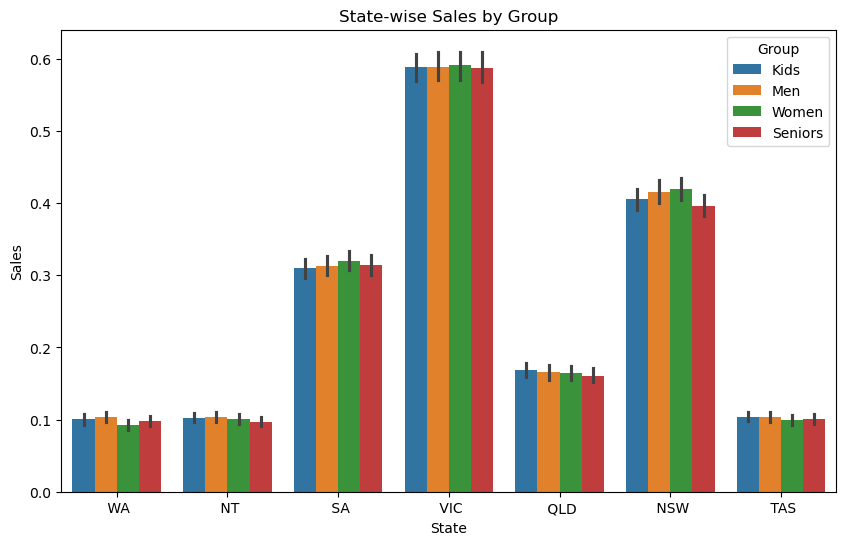

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='State', y='Sales', hue='Group')
plt.title('State-wise Sales by Group')
plt.show()

#### Observation

- Victoria (VIC): Highest sales across all groups (Kids, Men, Women, Seniors) with normalized values around 0.6.
- New South Wales (NSW): Second-best performer, with sales around 0.4 across all groups.
- South Australia (SA): Moderate sales, around 0.3 for all groups.
- Queensland (QLD): Sales around 0.2, showing potential but behind NSW, VIC, and SA.
- Western Australia (WA), Northern Territory (NT), Tasmania (TAS): Lowest sales, with values around 0.1 or slightly higher. Tasmania slightly lags behind WA and NT.

#### Recommendation

- Expand in VIC and NSW: Reinforce sales with loyalty programs and new product launches.
- Boost WA, NT, TAS: Prioritize Tasmania with targeted campaigns and discounts.
- Leverage Group Consistency: Maintain balanced marketing; explore product-specific growth opportunities.

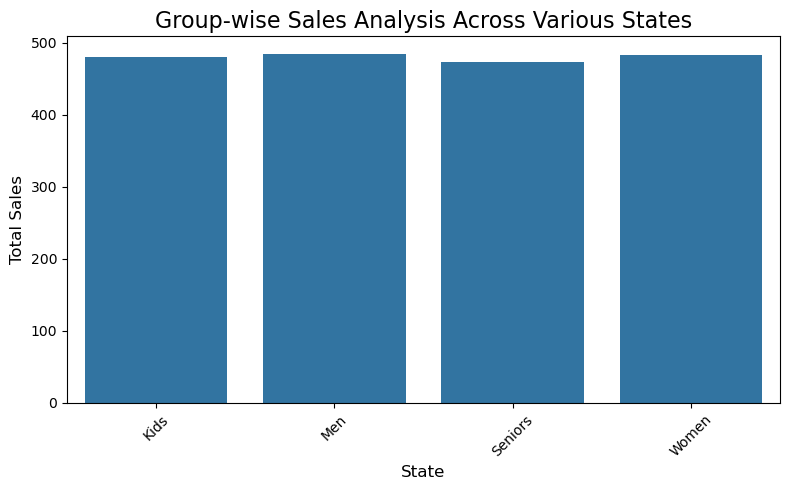

In [15]:
grouped_sales = data.groupby([ 'Group'])['Sales'].sum().reset_index()

# Plotting the grouped sales data
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_sales, x='Group', y='Sales')
plt.title('Group-wise Sales Analysis Across Various States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
#plt.legend(title="Group")
plt.tight_layout()
plt.show()

#### Observation

- Balanced Sales: The sales across the demographic groups (Kids, Men, Seniors, and Women) are very similar, with only slight variations.

- No Significant Outlier: None of the groups stands out as an underperformer or overperformer, indicating consistency in sales distribution across different groups.

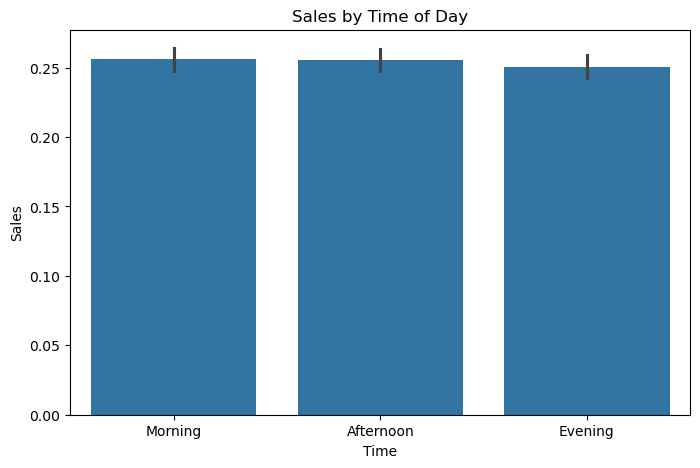

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(data=data, x='Time', y='Sales')
plt.title('Sales by Time of Day')
plt.show()

#### Observation

- Balanced Sales: Sales are relatively consistent across the time periods, with only slight differences. All periods show sales values slightly above 0.25.
- Morning Slightly Ahead: Sales during the Morning are marginally higher compared to the Afternoon and Evening, but the difference is not substantial.

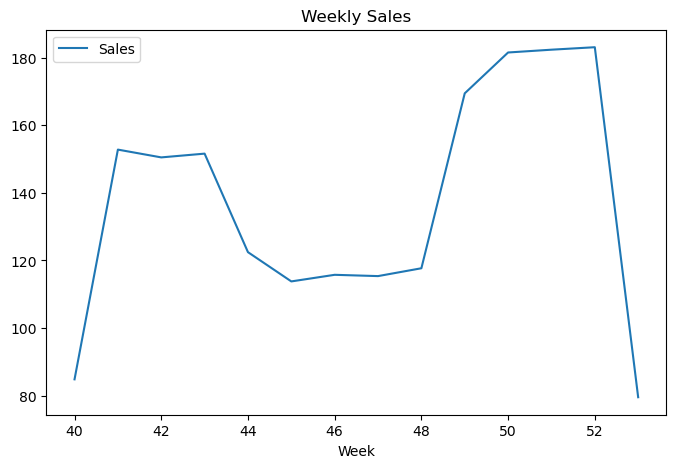

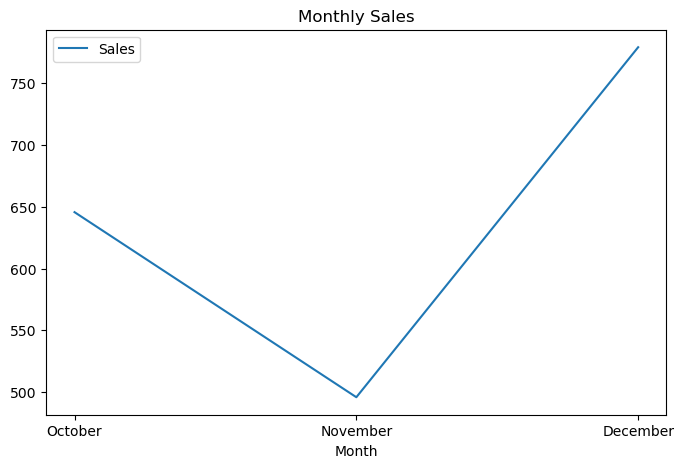

In [17]:
plt.figure(figsize=(8,5))
sns.lineplot(data=weekly_sales)
plt.title('Weekly Sales')
plt.show()

plt.figure(figsize=(8,5))
sns.lineplot(data=monthly_sales)
plt.title('Monthly Sales')
plt.xticks(ticks=[10, 11, 12], labels=['October', 'November', 'December'])
plt.show()

### Observation 

- **Weekly insight**
  
    - Weeks 40-42: Sharp sales increase, peaking at 160 units.
    - Weeks 43-46: Gradual decline, hitting just over 100 units.
    - Weeks 47-51: Sales rise again, peaking at 180 units.
    - Week 53: Sharp drop, sales fall below 100 units.
---------------------------------------------------------------------------------------------------------------------------------------------------
- **Monthly insight**
    - October: The month begins with strong sales. This suggests a healthy sales performance at the start of the fourth quarter, possibly driven by seasonal demand or promotions.

    - November: A sharp decline is observed. This could be due to factors like lower seasonal demand, fewer promotions, or external market influences causing a dip in consumer activity.

    - December: Sales make a strong recovery. This increase likely reflects holiday shopping, end-of-year promotions, or other seasonal factors that typically drive higher consumer spending during December.

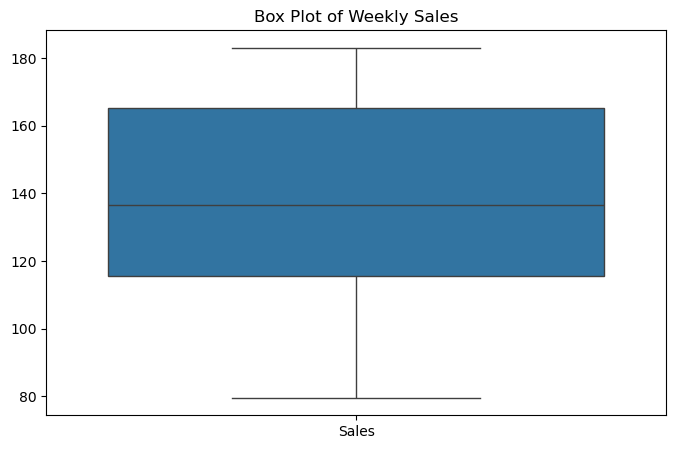

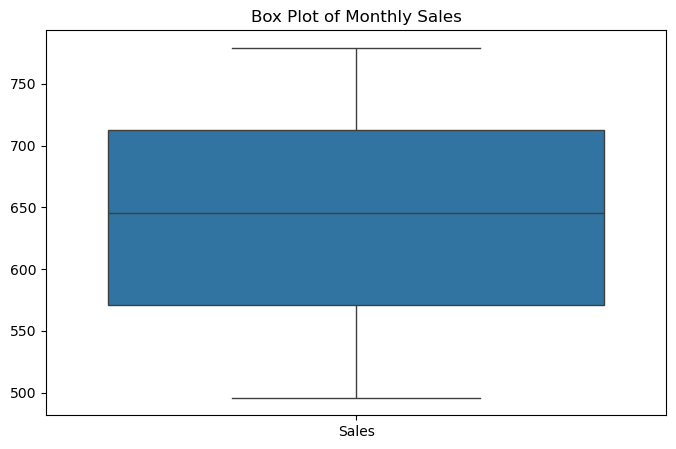

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(data=weekly_sales)
plt.title('Box Plot of Weekly Sales')
plt.show()

# Box plot for Monthly Sales
plt.figure(figsize=(8,5))
sns.boxplot(data=monthly_sales)
plt.title('Box Plot of Monthly Sales')
plt.show()

There aren't any outliers which means that there aren't any unexpectable rise in any week or any month.

<Axes: ylabel='Count'>

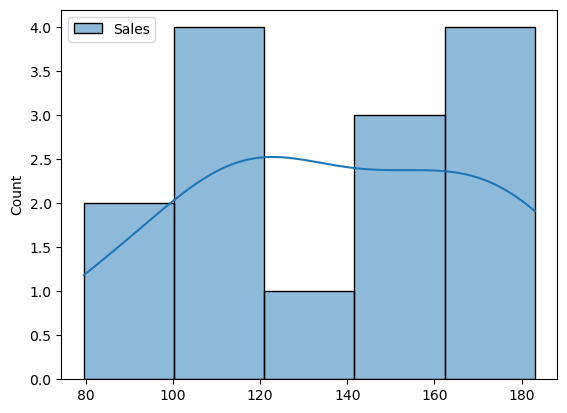